Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [12]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [14]:
columns_to_remove = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']
movies_df = movies_df.drop(columns=columns_to_remove)

#### Remove any duplicate rows

In [15]:
movies_df = movies_df.drop_duplicates()

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [16]:
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [17]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_year'] = movies_df['release_date'].dt.year

# Display the modified DataFrame
print(movies_df[['release_date', 'release_year']])


     release_date  release_year
0      2009-12-10          2009
1      2007-05-19          2007
2      2015-10-26          2015
3      2012-07-16          2012
4      2012-03-07          2012
...           ...           ...
4773   1994-09-13          1994
4788   1972-03-12          1972
4792   1997-11-06          1997
4796   2004-10-08          2004
4798   1992-09-04          1992

[3229 rows x 2 columns]


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [18]:
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

print(movies_df[['budget', 'revenue']])

         budget     revenue
0     237000000  2787965087
1     300000000   961000000
2     245000000   880674609
3     250000000  1084939099
4     260000000   284139100
...         ...         ...
4773      27000     3151130
4788      12000     6000000
4792      20000       99000
4796       7000      424760
4798     220000     2040920

[3229 rows x 2 columns]


On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [19]:
def parse_col_json(column, key):
    for index, data in zip(movies_df.index, movies_df[column].apply(json.loads)):
        values = []
        for j in range(len(data)):
            values.append(data[j][key])
        movies_df.loc[index, column] = str(values)

parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [9]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
4074,2000000,"['Horror', 'Thriller']",270303,100.876794,['United States of America'],2015-02-04,14674076,100.0,['English'],It Follows,6.6,1832,2015.0


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [20]:
# Filter only movies with the genre "Action"
action_movies = movies_df[movies_df['genres'].str.contains("Action")]

# Display the resulting DataFrame
print(action_movies) # the movies have more than one type of genre



         budget                                             genres      id  \
0     237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   19995   
1     300000000                 ['Adventure', 'Fantasy', 'Action']     285   
2     245000000                   ['Action', 'Adventure', 'Crime']  206647   
3     250000000           ['Action', 'Crime', 'Drama', 'Thriller']   49026   
4     260000000         ['Action', 'Adventure', 'Science Fiction']   49529   
...         ...                                                ...     ...   
4664     230000                       ['Drama', 'Action', 'Crime']   18533   
4670     400000  ['Adventure', 'Action', 'Thriller', 'Science F...    9659   
4701     150000                     ['Action', 'Drama', 'Romance']    5822   
4772      31192                      ['Drama', 'Action', 'Comedy']   42151   
4798     220000                    ['Action', 'Crime', 'Thriller']    9367   

      popularity                            production_countrie

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [23]:
# Assuming movies_df is your DataFrame
top_expensive_movies = movies_df.nlargest(5, 'budget')[['title', 'budget']]
print(top_expensive_movies)


                                          title     budget
17  Pirates of the Caribbean: On Stranger Tides  380000000
1      Pirates of the Caribbean: At World's End  300000000
7                       Avengers: Age of Ultron  280000000
10                             Superman Returns  270000000
4                                   John Carter  260000000


#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [55]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
top_profitable_movies = movies_df.nlargest(5, 'profit')

print("Top 5 Most Profitable Movies:")
print(top_profitable_movies[['title', 'profit']])


Top 5 Most Profitable Movies:
             title      profit
0           Avatar  2550965087
25         Titanic  1645034188
28  Jurassic World  1363528810
44       Furious 7  1316249360
16    The Avengers  1299557910


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [56]:
most_popular_movies = movies_df.nlargest(5, 'popularity')
print("Top 5 Most Popular Movies:")
print(most_popular_movies[['title', 'popularity']].head(5))


Top 5 Most Popular Movies:
                       title  popularity
546                  Minions  875.581305
95              Interstellar  724.247784
788                 Deadpool  514.569956
94   Guardians of the Galaxy  481.098624
127       Mad Max: Fury Road  434.278564


#### Find Movies which are rated above 7

In [25]:
highly_rated_movies = movies_df[movies_df['vote_average'] > 7]
print("Movies Rated Above 7:")
print(highly_rated_movies[['title', 'vote_average']])



Movies Rated Above 7:
                                       title  vote_average
0                                     Avatar           7.2
3                      The Dark Knight Rises           7.6
6                                    Tangled           7.4
7                    Avengers: Age of Ultron           7.3
8     Harry Potter and the Half-Blood Prince           7.4
...                                      ...           ...
4713                              Roger & Me           7.4
4724                              Eraserhead           7.5
4738                                      Pi           7.1
4773                                  Clerks           7.4
4792                                    Cure           7.4

[637 rows x 2 columns]


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

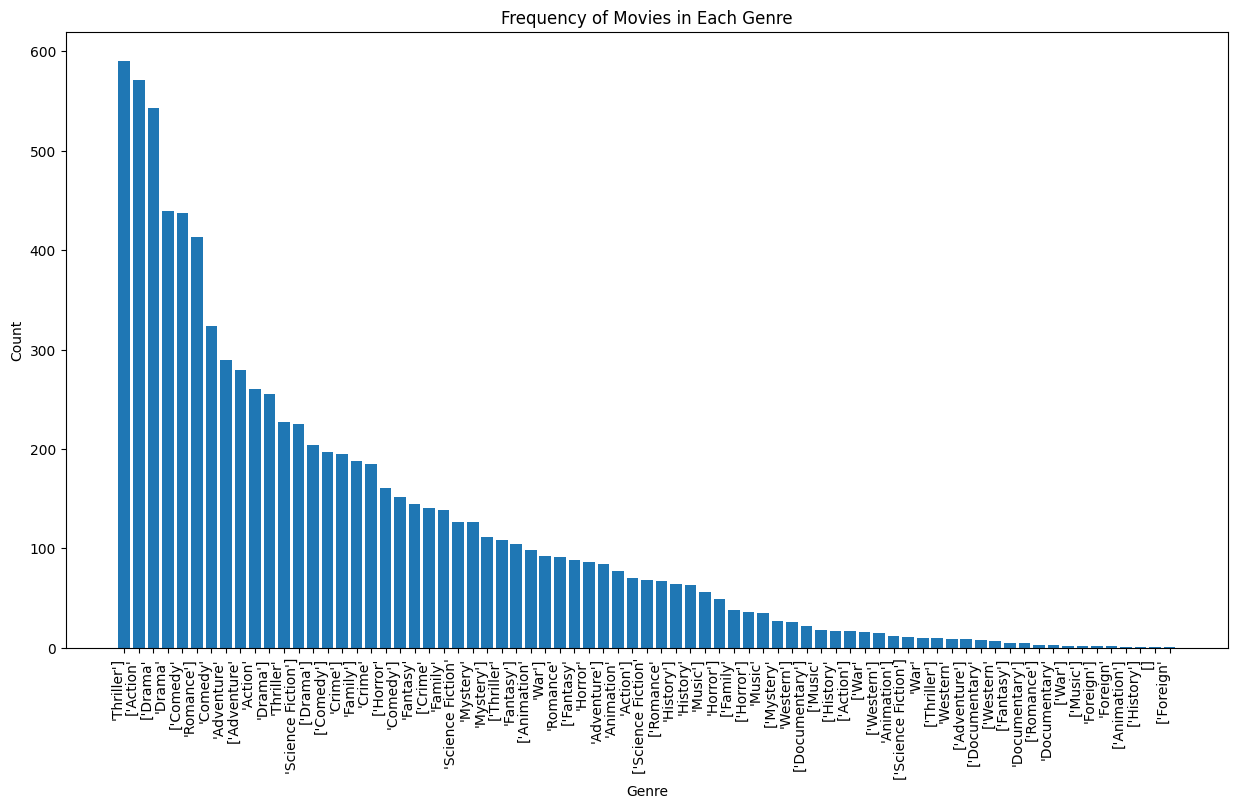

In [59]:
import matplotlib.pyplot as plt

# Sample data
genre_counts = movies_df['genres'].str.split(', ').explode().value_counts()

# Create a bar plot with rotated x-axis labels
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(genre_counts.index, genre_counts)

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Set plot labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Frequency of Movies in Each Genre')

# Show the plot
plt.show()



The bar graph affirms that the United States stands out as the primary producer of popular movies. This dominance aligns with the widespread appeal of thriller and fantasy genres, which rank among the most popular globally. On the other hand, the United Kingdom is notably recognized for its contribution to the film industry through the production of period dramas. However, it's observed that period dramas occupy a relatively lower position in terms of overall popularity compared to other genres.

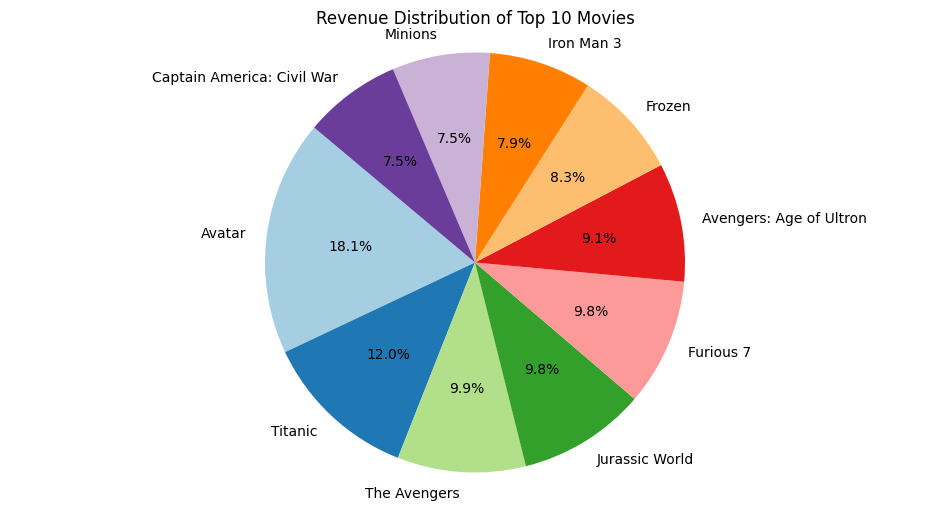

In [69]:
top_movies = movies_df.sort_values('revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.pie(top_movies['revenue'], labels=top_movies['title'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Revenue Distribution of Top 10 Movies')
plt.show()





This pie chart illustrates the revenue distribution of the top movies of our time, considering their genres. Notably, the genres encompass fantasy, action, and comedy, which are often associated with profitable movies. Additionally, it's noteworthy that these successful movies were released before the 2020 pandemic. This temporal factor may have contributed to their financial success, as exemplified by Avatar 2, which, released in 2022, did not replicate the revenue achievements of its predecessor, Avatar.

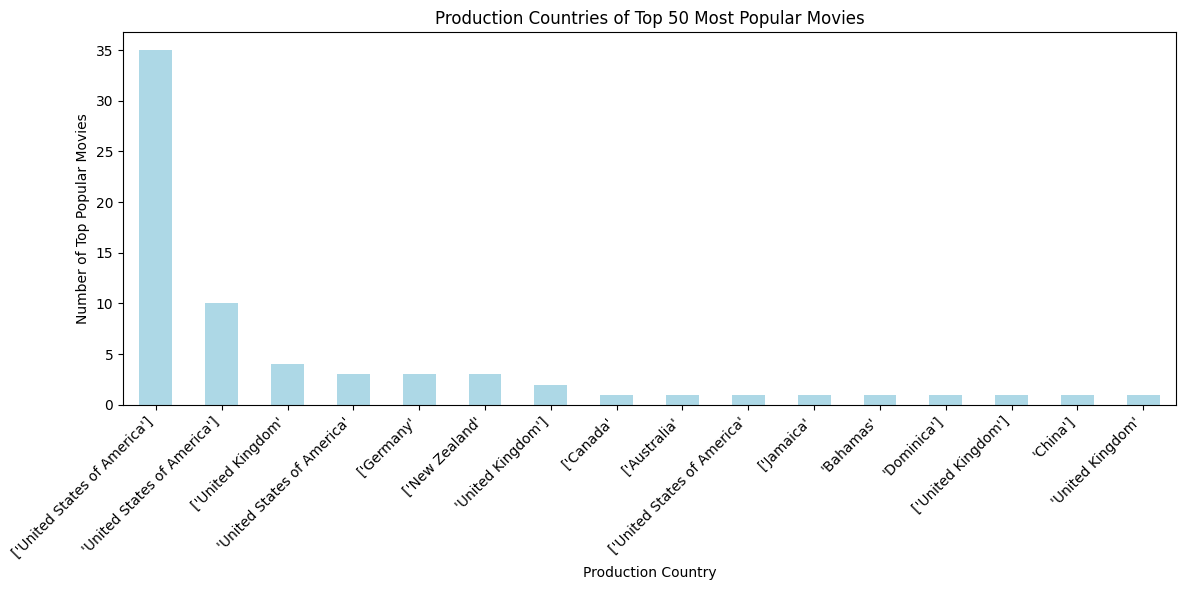

In [68]:
top_popular_movies = movies_df.sort_values('popularity', ascending=False).head(50)
production_countries_popular = top_popular_movies['production_countries'].str.split(', ').explode()
plt.figure(figsize=(12, 6))
production_countries_popular.value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Production Country')
plt.ylabel('Number of Top Popular Movies')
plt.title('Production Countries of Top 50 Most Popular Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




The bar grpaph confirms that the Amerca producess the most popluer movies which is also seen as a factor in they number of thriller and fantsy wich is the one of the ost populra geberoulse 

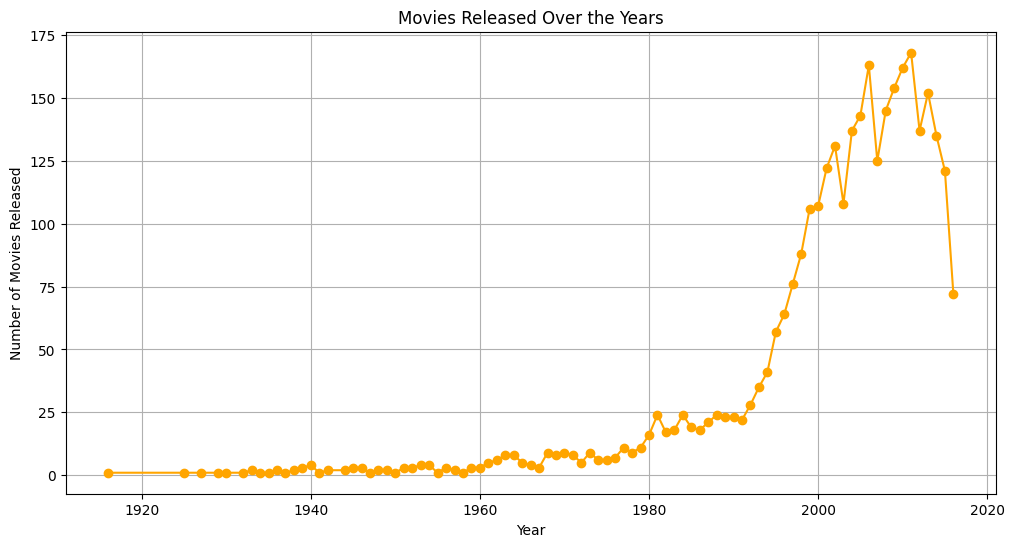

In [67]:
movies_df['release_year'] = pd.to_datetime(movies_df['release_date']).dt.year
movie_counts_per_year = movies_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(movie_counts_per_year.index, movie_counts_per_year.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Movies Released Over the Years')
plt.grid(True)
plt.show()



This line graph depicts two notable trends: first, the upward trajectory in the production of movie releases over time, and second, a distinct decline in popularity. This decline could be attributed to either the impact of the 2020 pandemic or the surge in popularity of digital home movie platforms, which are less reliant on physical audience attendance.